In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time
%matplotlib inline

**OpenCV** - Open Source Computer Vision Library :

                    It uses machine learning algorithms to search for faces within a picture. For something as complicated as a face, there isn’t one simple test that will tell you if it found a face or not. Instead, there are thousands of small patterns/features that must be matched. The algorithms break the task of identifying the face into thousands of smaller, bite-sized tasks, each of which is easy to solve. These tasks are also called classifiers.

Face Detection can be done in three simple steps:

* Convert image to gray
* Use pretrained Classifier
* Use a rectangle frame to capture the frame and display it 

In [2]:
# We have RGB-(Red,Blue,Green) Color space and GBR-(Green,Blue,Red). OpenCV uses GBR color space. 
# Now we generally use RGB.SO, we need to convert to RGB
def convertToRGB(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [3]:
# Loading image
test = cv2.imread('modi.jpg')
# Converting it to gray image. classifiers use only gray images to classify
gray_image = cv2.cvtColor(test,cv2.COLOR_BGR2GRAY)

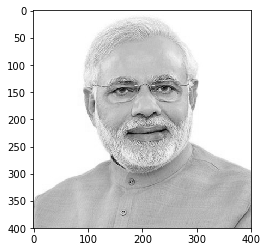

In [4]:
# displaying image in gray scale 
plt.imshow(gray_image,cmap='gray')

We have two **classifiers** for face detection.
* Haar Classifier
* LBP Classifier

In [5]:
# This is haar classifier(detect faces) which is pre-trained on many faces.
haar_cascade = cv2.CascadeClassifier('C:/Users/Lenovo/Anaconda3/pkgs/opencv-3.3.1-py36h20b85fd_1/Library/etc/haarcascades/haarcascade_frontalface_alt.xml')

In [6]:
# This is to detect faces - (image, scaleFactor, minNeighbours)
faces = haar_cascade.detectMultiScale(gray_image)

In [7]:
faces

array([[ 99,  60, 215, 215]], dtype=int32)

In [8]:
# print number of faces found
print('Faces found:',len(faces))

Faces found: 1


In [9]:
for (x,y,w,h) in faces:
    cv2.rectangle(test,(x,y),(x+w,y+h),(0,255,0),3)

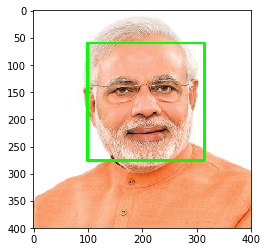

In [10]:
plt.imshow(convertToRGB(test))

Make every thing in a function

In [11]:
test2 = cv2.imread('Av.JPG')

In [12]:
# We define detect face function which takes cascade, image and scalingFactor
def detect_faces(f_cascade,colored_image,scalingFactor):
    # Taking copy of the image
    img_copy = colored_image.copy()
    # Converting coloured image to gray
    gray = cv2.cvtColor(img_copy,cv2.COLOR_BGR2GRAY)
    # Using cascade for detection 
    faces = f_cascade.detectMultiScale(gray,scalingFactor)
    # Framing a box for each face
    for (x,y,w,h) in faces:
        cv2.rectangle(img_copy,(x,y),(x+w,y+h),(0,255,255),3)
    # return the framed image
    return img_copy

In [13]:
# Using the function
detected_image = detect_faces(haar_cascade,test2,scalingFactor=1.01)

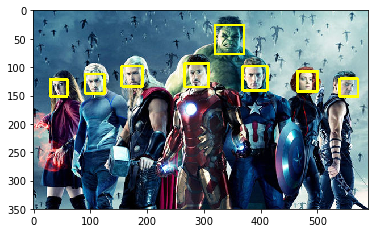

In [14]:
# Convert the image back to its original color
plt.imshow(convertToRGB(detected_image))

Similarly OpenCV also works with **webcam**:

** Video ** is nothing but sequence of frames, so now each and every frame is classified constantly. So, we can use the same method which is used in image with videos.

In [15]:
# Opens the webcam
video_capture = cv2.VideoCapture(0)

# While web cam is open
while True:
    # Read the video
    ret,frame = video_capture.read()
    # Converting to gray
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    # Detecting faces using pre trained classifiers
    faces = haar_cascade.detectMultiScale(gray,scaleFactor = 1.1,minNeighbors = 5,minSize = (30,30))
    # displaying a box for each face
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),3)
    # diaplaying the image
    cv2.imshow('video',frame)
    # if you press q then stop display window
    if cv2.waitKey(1) == ord('q'):
        break
# we release the video capture
video_capture.release()
cv2.destroyAllWindows()